In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
import seaborn as sns

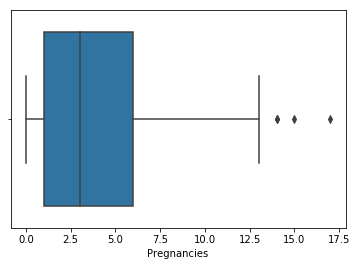

In [6]:
sns.boxplot(df['Pregnancies'])

In [7]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [8]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [10]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [11]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [12]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [13]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [14]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [16]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [17]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [18]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [19]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [20]:
df.loc[:,'N1']=0
df.loc[(df['Age']<=30) & (df['Glucose']<=120),'N1']=1

In [21]:
df.loc[:,'N2']=0
df.loc[(df['BMI']<=30),'N2']=1

In [22]:
df.loc[:,'N3']=0
df.loc[(df['Age']<=30) & (df['Pregnancies']<=6),'N3']=1

In [23]:
df.loc[:,'N4']=0
df.loc[(df['Glucose']<=105) & (df['BloodPressure']<=80),'N4']=1

In [24]:
df.loc[:,'N5']=0
df.loc[(df['SkinThickness']<=20) ,'N5']=1

In [25]:
df.loc[:,'N6']=0
df.loc[(df['BMI']<30) & (df['SkinThickness']<=20),'N6']=1

In [26]:
df.loc[:,'N7']=0
df.loc[(df['Glucose']<=105) & (df['BMI']<=30),'N7']=1

In [27]:
df.loc[:,'N9']=0
df.loc[(df['Insulin']<200),'N9']=1

In [28]:
df.loc[:,'N10']=0
df.loc[(df['BloodPressure']<80),'N10']=1

In [29]:
df.loc[:,'N11']=0
df.loc[(df['Pregnancies']<4) & (df['Pregnancies']!=0) ,'N11']=1

In [30]:
df['N0'] = df['BMI'] * df['SkinThickness']

df['N8'] =  df['Pregnancies'] / df['Age']

df['N13'] = df['Glucose'] / df['DiabetesPedigreeFunction']

df['N12'] = df['Age'] * df['DiabetesPedigreeFunction']

df['N14'] = df['Age'] / df['Insulin']


In [31]:
df.loc[:,'N15']=0
df.loc[(df['N0']<1034) ,'N15']=1

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,N1,...,N7,N9,N10,N11,N0,N8,N13,N12,N14,N15
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,...,0,1,1,0,1176.0,0.120000,236.044657,31.350,0.294985,0
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,...,1,1,1,1,771.4,0.032258,242.165242,10.881,0.302439,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,1,1,0,745.6,0.250000,272.321429,21.504,0.188791,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,1,1,1,1,646.3,0.047619,532.934132,3.507,0.223404,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,0,1,1,0,1508.5,0.000000,59.877622,75.504,0.196429,0


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [33]:
df.shape

(768, 25)

In [34]:
 from sklearn.preprocessing import StandardScaler

In [35]:
X = df.drop(['Outcome'], 1)
y = df['Outcome']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [38]:
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

Using TensorFlow backend.


In [39]:
model = Sequential()
model.add(Dense(32,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [40]:
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, verbose=1, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                800       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [41]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred=model.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred)

0.9090909090909091

In [44]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [ 6, 41]])

In [45]:
target_col = ["Outcome"]
cat_cols   = df.nunique()[df.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]

In [46]:
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]

In [47]:
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

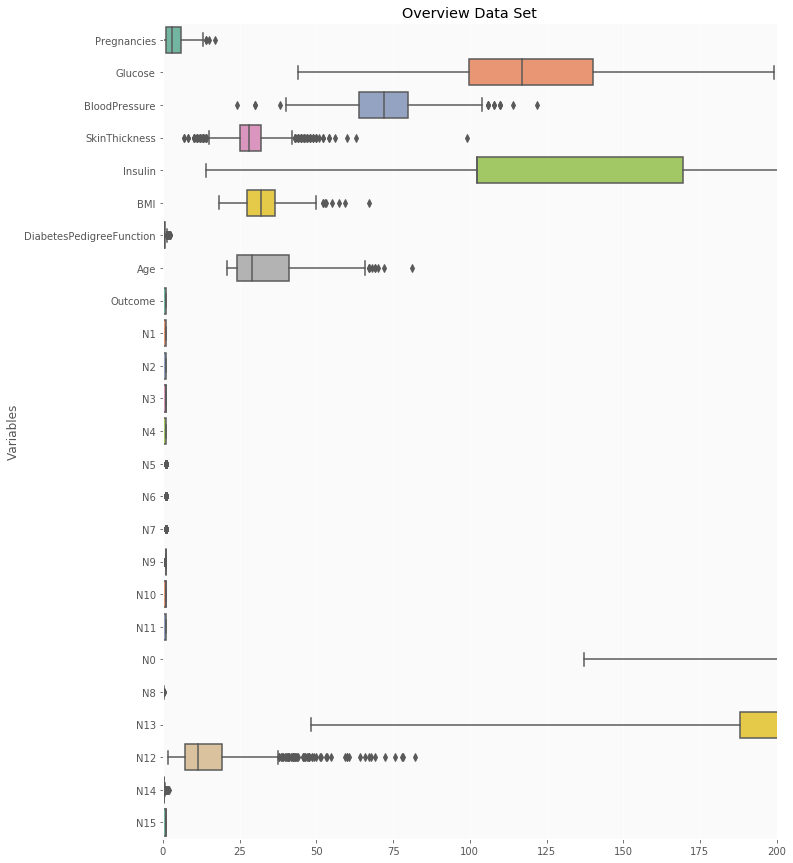

In [48]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [49]:
df['SkinThickness']=

SyntaxError: invalid syntax (<ipython-input-49-11446791f249>, line 1)

In [50]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness']>35), 'SkinThickness'] = 27

In [51]:
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness']>35), 'SkinThickness'] = 32

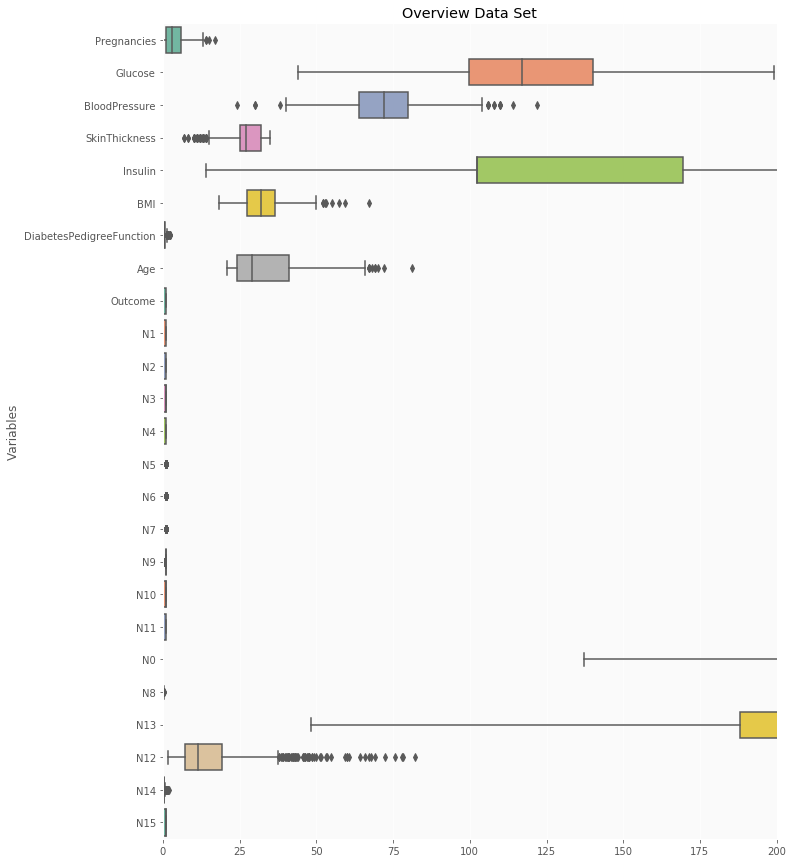

In [52]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [53]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


In [54]:
df.loc[(df['Outcome'] == 0 ) & (df['Pregnancies']>13), 'Pregnancies'] = 2

In [55]:
df.loc[(df['Outcome'] == 1 ) & (df['Pregnancies']>13), 'Pregnancies'] = 4

In [56]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


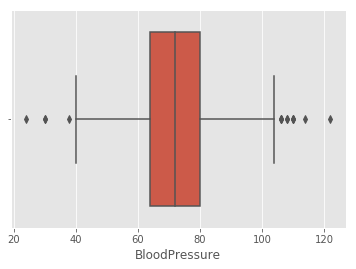

In [57]:
sns.boxplot(df['BloodPressure'])

In [58]:
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure']>105), 'BloodPressure'] = 74.5

In [59]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure']>105), 'BloodPressure'] = 70

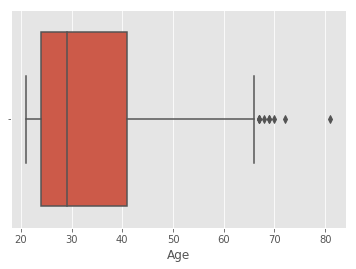

In [60]:
sns.boxplot(df['Age'])

In [61]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


In [62]:
df.loc[(df['Outcome'] == 1 ) & (df['Age']>65), 'Age'] = 36

In [63]:
df.loc[(df['Outcome'] == 0 ) & (df['Age']>65), 'Age'] = 27

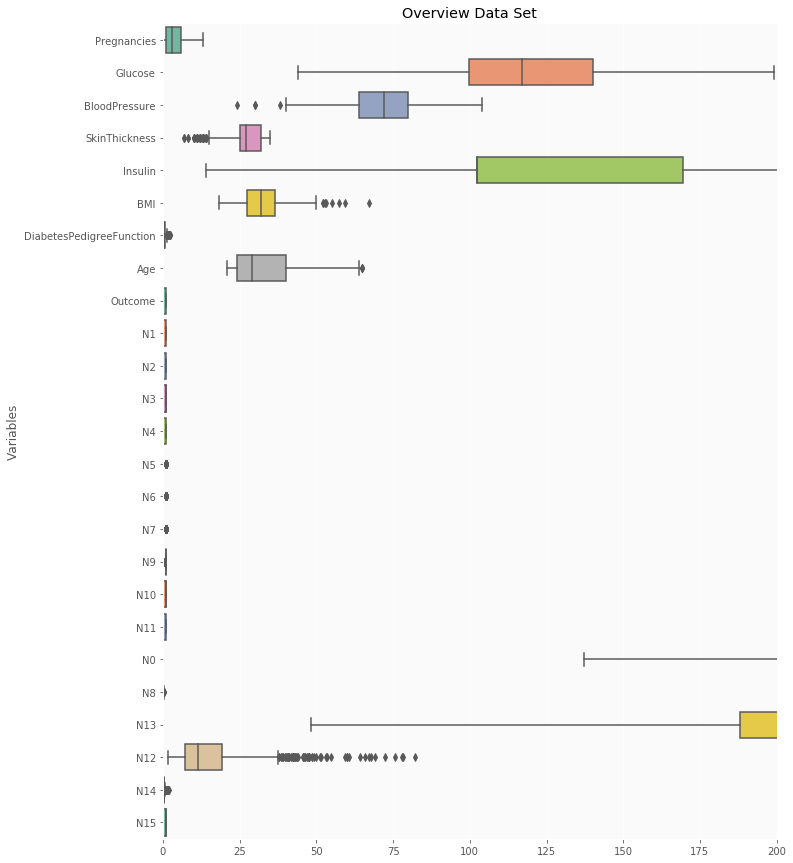

In [64]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [65]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


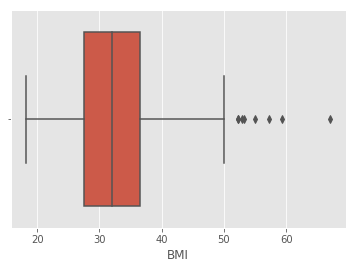

In [66]:
sns.boxplot(df['BMI'])

In [67]:
df.loc[(df['Outcome'] == 1 ) & (df['BMI']>50), 'BMI'] = 34.5

In [68]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI']>50), 'BMI'] = 30.1

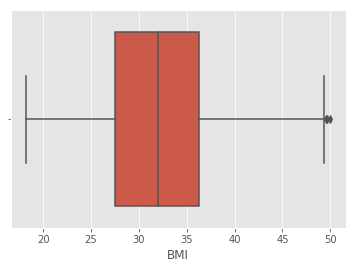

In [69]:
sns.boxplot(df['BMI'])

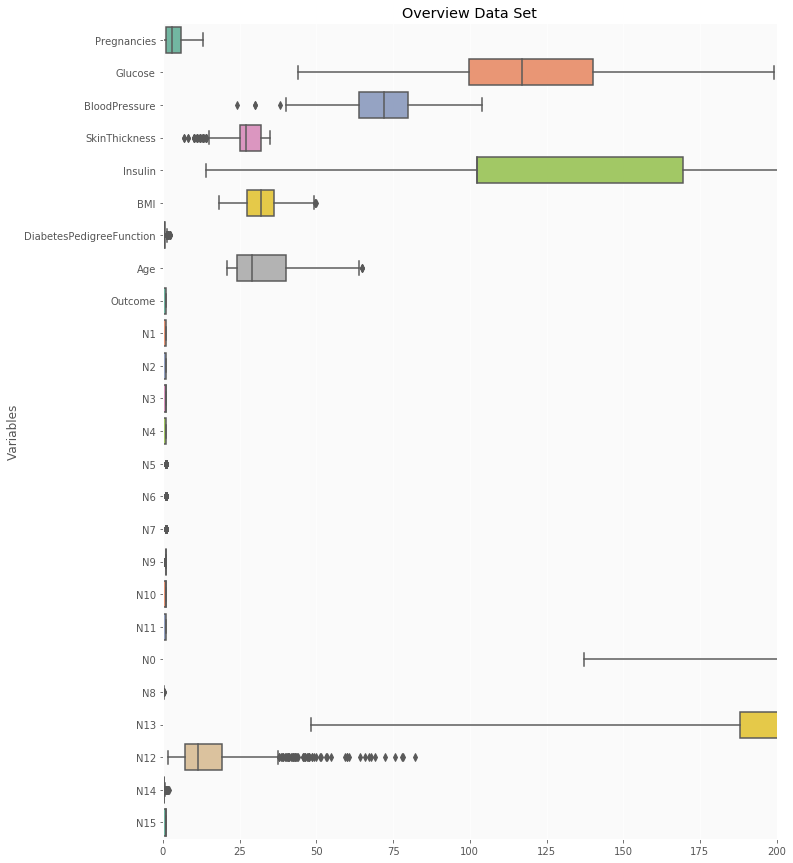

In [70]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [71]:
scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,N0,N8,N13,N12,N14
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,0.436284,0.144246,-0.561641,1.202461,-0.023905
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,-0.455696,-0.929227,-0.538026,-0.382029,0.014204
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,-0.512575,1.734723,-0.421674,0.440289,-0.566853
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,-0.731491,-0.741294,0.583847,-0.952845,-0.389882
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1.169312,-1.323886,-1.241345,4.620388,-0.527802


In [72]:
# Def X and Y
X = df.drop('Outcome', 1)
y = df['Outcome']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [74]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.639, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [76]:
print(grid.best_params_) 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [77]:
print(grid.best_estimator_) 

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [78]:
model=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred=model.predict(x_test)

In [80]:
confusion_matrix(y_test,y_pred)

array([[99,  8],
       [ 3, 44]])

In [81]:
accuracy_score(y_test,y_pred)

0.9285714285714286

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.85      0.94      0.89        47

    accuracy                           0.93       154
   macro avg       0.91      0.93      0.92       154
weighted avg       0.93      0.93      0.93       154



In [84]:
 from sklearn.neighbors import KNeighborsClassifier
harsh=KNeighborsClassifier(n_neighbors=25)

In [85]:
harsh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [86]:
y_pred=harsh.predict(x_test)

In [87]:
confusion_matrix(y_test,y_pred)


array([[89, 18],
       [18, 29]])

In [88]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [89]:
 from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [90]:
knn_clf = KNeighborsClassifier(n_neighbors = 25)
harsh=VotingClassifier(estimators = [('knn', knn_clf), ('lgbm', lgbm_clf)],
                      weights = [1,1]))

SyntaxError: invalid syntax (<ipython-input-90-ec50c3fef93c>, line 3)

In [91]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [92]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())

In [93]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].median())

In [94]:
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [95]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].median())

In [96]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
N1                          0
N2                          0
N3                          0
N4                          0
N5                          0
N6                          0
N7                          0
N9                          0
N10                         0
N11                         0
N0                          0
N8                          0
N13                         0
N12                         0
N14                         0
N15                         0
dtype: int64

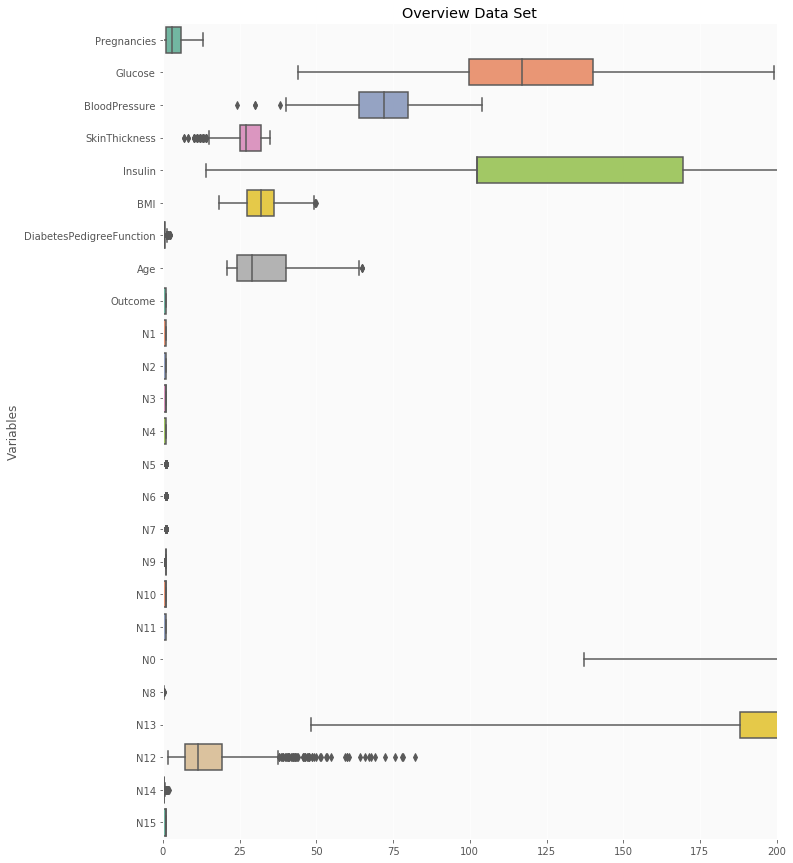

In [97]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

median_target('Insulin')

In [98]:
plot_distribution('Glucose', 0)

NameError: name 'plot_distribution' is not defined